# Week 46

In [2]:
try:
    import fysisk_biokemi
    print("Already installed")
except ImportError:
    %pip install -q "fysisk_biokemi[colab] @ git+https://github.com/au-mbg/fysisk-biokemi.git"

In [3]:
import numpy as np

## Extinction coefficient of human myoglobin

The protein of human myoglobin is given below

In [4]:
sequence = """GLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGA
TVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNY
KELGFQG"""

We want to calculate the *extinction coefficient* of this protein, we
have seen that this can be calculated using the formula

<span id="eq-extinction">$$
\epsilon(280 \mathrm{nm}) = N_{Trp} \epsilon_{Trp} + N_{Tyr} \epsilon_{Tyr} + N_{Cys} \epsilon_{Cys} 
 \qquad(1)$$</span>

Where $N_{Trp}$ is the number of Tryptophan in the protein (and likewise
for the other two terms), and the three constants $A$, $B$ and $C$ are
given as

$$
\begin{align}
\epsilon_{Trp} &= 5500 \ \mathrm{M^{−1} cm^{−1}} \\
\epsilon_{Tyr} &= 1490 \ \mathrm{M^{−1} cm^{−1}} \\
\epsilon_{Cys} &= 125 \ \mathrm{M^{−1} cm^{−1}}
\end{align}
$$

In order to calculate the formula we need to know the count of the
relevant residues, we can use Python to get that - for example we can
count the number of Tryptophan like so;

In [5]:
N_trp = sequence.count("W")

#### (a) Determine the number of residues

In the cell below find the number of residues

In [7]:
N_tyr = ... # Your code here
... # Your code here for the N_cys.

You can check what Python has stored each variable by using `print`

In [8]:
print(N_trp)
print(f"{N_tyr = }") # This is just a way of make a string that looks nice.
print(f"{N_cys = }")

2
N_tyr = 2
N_cys = 1

#### (b) Calculate the extinction coefficient

Use equation
(<a href="#eq-extinction" class="quarto-xref">Equation 1</a>) to
calculate the extinction coefficient of human myoglobin.

In [9]:
eps_trp = 5500
eps_tyr = 1490
eps_cys = 125

In [10]:
epsilon = ... # Erstat ... med din kode.
print(epsilon)

What are the units of this value?

#### (c) Compare residue count to ProtParam

ProtParam is an online tool that calculates various physical and
chemical parameters from a given protein sequence and is used worldwide
in research laboratories.

<figure>
<img
src="https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/week_46/protpram_input.png"
alt="Protpram tool input page." />
<figcaption aria-hidden="true">Protpram tool input page.</figcaption>
</figure>

Go to ProtPram at this link: <https://web.expasy.org/protparam/> and
paste the sequence and click **Compute Parameters**. You should then see
the calculated parameters, similar to in the image below

<figure>
<img
src="https://raw.githubusercontent.com/au-mbg/fysisk-biokemi/refs/heads/main/lessons/figures/week_46/protpram_output.png"
alt="Protpram tool calculated properties." />
<figcaption aria-hidden="true">Protpram tool calculated
properties.</figcaption>
</figure>

On the output page you will see the number of residues, does that match
your calculation?

#### (d) Calculate the absorbance

Using the extinction coefficient and the molecular weight given by
ProtParam, calculate the absorbance at 280 nm of a myoglobin solution at
a concentration of 1 mg/mL in a cuvette with a light path of 1 cm.

In [13]:
molecular_weight = ... # Find the value on ProtPram (It has units of g/mol)
path_length = ... # Set the value of the path length
concentration = ... # Set the value of the concentraiton.

Remember to convert the concentration to $\mathrm{mol/L}$.

In [14]:
A280 = ...
print(A280)

This value is what is known as the A280(0.1%) of a protein, i.e. the
absorbance of a given protein at a concentration of 0.1% weight/volume
(= 1 g/L = 1 mg/mL).

#### (e) Tintin

We have now calculated the extinction coefficient of a protein, now we
will make our code more reusable so that it can be applied to other
proteins easily.

> **Note**
>
> A function in Python is a set of instructions, like a recipe, that can
> be defined and reused multiple times. The syntax is like this
>
> ``` python
> def my_function(input_1, input_2):
>     # Some operation 
>     some_internal_variable = input_1 + input_2
>     ... 
>     return something_weve_calculated
> ```
>
> Line 1  
> The `def` command is used to define the functions name, here
> `my_function`, and state its inputs, e.g. the name and ingredients of
> a recipe.
>
> Line 3  
> The body of the function defines what it does, the body can have any
> number of lines of code. Similar to the instructions of a recipe.
>
> Line 5  
> Finally, the function can `return` something, like the final product
> of a recipe.
>
> Note that the function is not executed by doing this, like how a cake
> isn’t baked by writing down the recipe, in order actually use the
> function it needs to be *called*
>
> ``` python
> output = my_function(1, 2)
> ```
>
> This is also how we have already used other functions like `print`.

The way of doing so is by defining a function that does the necessary
operations for a given sequence. In this way the code can be reused for
any sequence.

Finish implementing the body of the function below, note that you have
already written all the required code - you just need to copy it into
the function.

In [16]:
def extinction_coefficient(sequence):

    # Start by counting
    ...

    # Define the residue extinction coeffiecients
    eps_trp = 5500
    eps_tyr = 1490
    eps_cys = 125

    # Calculate 
    epsilon = ...

    return epsilon

It’s always a good idea to check that functions do what we expect, so we
can confirm that it gives the same result for human myoglobin as we
calculated before

In [18]:
epsilon_func = extinction_coefficient(sequence)
print(f"Epsilon: {epsilon}")
print(f"Epsilon from function: {epsilon_func}")

The largest known protein is Titin, the cell below loads the sequence of
titin and prints a few bits of information about it.

In [20]:
from fysisk_biokemi.datasets import load_dataset
titin_sequence = load_dataset('titin')

print(f'Titin number of residues: {len(titin_sequence)}')
print('First 100 residues')
print(titin_sequence[0:100])

Use your function to calculate the extinction coefficient of titin.

In [22]:
titin_eps = ... # Your code here. 
print(titin_eps)

------------------------------------------------------------------------

> **Tip**
>
> You don’t need to understand the code below, it’s just ment to
> illustrate that knowing some Python will allow you to explore the
> topics that interest you in more detail.

In general Python is very powerful at letting us explore properties of
sequences, for example the cell below calculates number of residues
between each Tryptophan in the Titin sequence and plot the distribution.

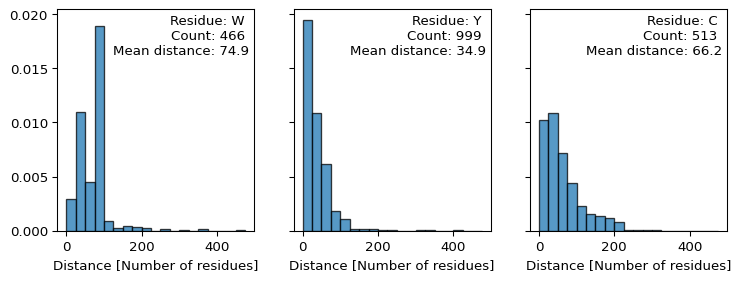

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def get_distance(sequence, letter):
    W_index = np.argwhere(np.array([l for l in sequence]) == letter)
    count = len(W_index)
    distance = (W_index - np.roll(W_index, 1))[1:]
    return distance, count

letters = ['W', 'Y', 'C']

fig, axes = plt.subplots(1, 3, figsize=(3*3, 3), sharey=True)
axes = axes.flatten()

for ax, letter in zip(axes, letters):
    distance, count = get_distance(titin_sequence, letter)
    ax.hist(distance, bins=np.arange(0, 500, 25), 
        edgecolor='black', alpha=0.75, density=True)
    ax.set_xlabel('Distance [Number of residues]')
    info = f'Residue: {letter} \nCount: {count} \nMean distance: {np.mean(distance):.1f}'
    ax.text(0.975, 0.975, info, transform=ax.transAxes, ha='right', va='top')

------------------------------------------------------------------------

## Average properties of amino acids and proteins.

In [25]:
import numpy as np

In the accompanying Excel file (`week46_1_AA_frequency.xlsx`), you will
find a table that contains the molecular weight of the 20 common amino
acid residues, i.e. their weight as residues in a peptide chain.
Additionally, you will find their relative frequency in E. coli
proteins, where a frequency of 0.01 means that this residue constitutes
1 % of the residues in a protein.

#### (a) Load the data file.

Use the widget below to load the `week46_1_AA_frequency.xlsx` file.

In [26]:
from IPython.display import display 
from fysisk_biokemi.widgets import DataUploader
uploader = DataUploader()
uploader.display()

The command below will display the table as a `DataFrame`.

In [27]:
df = uploader.get_dataframe()
display(df)

#### (b) Average molecular weight

Calculate the average molecular weight of a residue in a protein. To do
this our procedure will be as follows

1.  First calculate the residue weight times its frequency in proteins
    for each residue.
2.  Sum these together to get the average molecular weight.

In the cell below finish the calculation of `weight_times_freq` by
extracting the `"MW of AA residue"`-column and `"Frequency in proteins"`
and multiplying them together.

> **Tip**
>
> You can index in the dataframe by using the column name, for example
> to get the `"MW of AA residue"`-column you would do
>
> ``` python
> col = df["MW of AA residue"]
> ```
>
> Arrays also allows us to operate on every element in the array at the
> same time, so arrays can be added, subtracted, multiplied, divided,
> etc, see for example this figure
>
> ![](https://numpy.org/doc/stable/_images/np_array_dataones.png)
> ![](https://numpy.org/doc/stable/_images/np_sub_mult_divide.png)

In [29]:
weight_times_freq = ...

> **Tip**
>
> You can use `np.sum` to sum all values in an array. For example
>
> ``` python
> array = np.array([1, 2, 3, 4, 5])
> sum_of_array = np.sum(array) # Gives 15 
> ```

In [31]:
average_mw = ...
print(f"{average_mw = :.3f}")

> **Note**
>
> The syntax `f"{average_mw = :.3f}"` is just a way of printing the
> value with a nicer format, in this case we print the value to 3
> decimal places. In Python these are called f-strings, you don’t need
> to understand the details at the moment.

#### (c) Weight of 300-residue protein

What would the molecular weight of a 300-residue protein most likely be,
if you did not know its sequence?

In [33]:
mw_300 = ...
print(f"{mw_300 = :.3f}")

------------------------------------------------------------------------

In many projects, you will be working with a mixture of proteins. This
could for example be a cell lysate or a biological fluid for protein
abundance analysis, or the early stages of a protein purification
process. In these situations, you cannot work with a molecule specific
extinction coefficient. Instead, we would use the average values, which
we will determine below.

------------------------------------------------------------------------

#### (d) Average concentration of residues

Calculate the average concentration of amino acid residues in a protein
mixture at 1 mg/mL.

In [35]:
c_residue_avg = ...
print(f"{c_residue_avg = :3.3f} M")

#### (e) Absorbance

Calculate the absorbance from such a mixture under the assumption that
only Trp and Tyr contribute.

In [37]:
freq = df.set_index("Name")["Frequency in proteins"]
f_trp = freq["Tryptophan (Trp/W)"]
f_tyr = freq["Tyrosine (Tyr/Y)"]
c_trp = ... # Erstat med din kode.
c_tyr = ... # Erstat med din kode.

print(f"{c_trp = :3.5f}")
print(f"{c_tyr = :3.5f}")

In [39]:
A280 = ... # Erstat med din kode.
print(f"{A280 = :3.3f}")

#### (f) Adsorbance $\rightarrow$ concentration

For a cell lysate, you measure and absorbance of 0.78 at a path length
of 0.5 cm. What is the protein concentration?

In [41]:
# Set known values:
A = 0.78 # Unitless
l = 0.5 # cm

# Extract frequencies
freq = df.set_index("Name")["Frequency in proteins"]
f_trp = freq["Tryptophan (Trp/W)"]
f_tyr = freq["Tyrosine (Tyr/Y)"]

# Calculate extintinction coefficent in [L/(mol cm)]
eps_mix = ...
# Calculate molar concentration [mol/L]
c_res = ...
# Calculate concentration [g/L] = [mg/mL]:
conc_mg_per_mL = ...
print(f"Protein concentration = {conc_mg_per_mL:.3f} mg/mL")